## Name- Harsh Agrawal CSE SEM-7 Shift-2 RollNo-43
### DVA LAB Practical No-3

### Aim: Market basket analysis using apriori algorithm in Python [Association rule mining]

PART(A): Apply Apriori algorithm on the Online retail dataset.
1. Follow the given steps for the Online retail dataset as given in the practice sheet.
[sent]

Practice Sheet [ Part A is below the Practice Sheet]

In [1]:
import pandas as pd

In [2]:
#1. Import Dataset
data=pd.read_csv("retail_data2.csv")

In [3]:
display(data);

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [4]:
#2. Drop all Null Values
data=data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
# 3. Using the Positive ‘Quantity’ Values
data_plus=data[data["Quantity"]>=0]
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397925 non-null  object 
 1   StockCode    397925 non-null  object 
 2   Description  397925 non-null  object 
 3   Quantity     397925 non-null  int64  
 4   InvoiceDate  397925 non-null  object 
 5   Price        397925 non-null  float64
 6   Customer ID  397925 non-null  float64
 7   Country      397925 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [7]:
data_plus

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [8]:
#4. Create the Basket Data while using the Transaction from UK only

basket_plus=(data_plus[data_plus['Country']=="United Kingdom"].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

basket_plus

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 5. Encode the data
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_encode_plus= basket_plus.applymap(encode_units)
basket_encode_plus

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#7. Filter the Transaction:  Brought More Than 1 Items Only
basket_filter_plus=basket_encode_plus[(basket_encode_plus>0).sum(axis=1)>=2]

basket_filter_plus

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#. 8. Apply the Apriori Algorithm
from mlxtend.frequent_patterns import apriori

In [12]:
!pip install mlxtend

In [13]:
frequent_itemsets_plus_1 = apriori(basket_filter_plus, min_support=0.03,
                                use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus_1['length']=frequent_itemsets_plus_1['itemsets'].apply(lambda x:len(x))

frequent_itemsets_plus_1

C:\Users\agraw\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.093197,(JUMBO BAG RED RETROSPOT),1
2,0.090466,(REGENCY CAKESTAND 3 TIER),1
3,0.084417,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.082986,(PARTY BUNTING),1
...,...,...,...
103,0.030697,(DOORMAT UNION FLAG),1
104,0.030632,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",2
105,0.030502,(SET OF 3 HEART COOKIE CUTTERS),1
106,0.030372,(DOLLY GIRL LUNCH BOX),1


In [14]:
#. 8. Finding The Association Between Frequently Bought Items

from mlxtend.frequent_patterns import association_rules

In [16]:
association_rules(frequent_itemsets_plus_1, metric='lift',
                 min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574
4,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152
5,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164


# ---------------------------------------------------------------------------------------------------------------

## PART A
## 2. Do as Directed:

a. Create basket data using the transactions from Germany, encode it and
consider only the transactions with more than 1 item only.

In [19]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
data_plus=data[data["Quantity"]>=0]

basket_plus=(data_plus[data_plus['Country']=="Germany"].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))
basket_encode_plus= basket_plus.applymap(encode_units)
basket_encode_plus

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


b. Apply the apriori algorithm and find associations between the frequently
bought items. Conclude which items are bought together.

In [20]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_plus = apriori(basket_filter_plus,min_support=0.03,
                                use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus[::-1]

C:\Users\agraw\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
468,0.030023,"(JUMBO BAG PINK POLKADOT, POSTAGE)",2
467,0.030023,"(ROUND SNACK BOXES SET OF4 WOODLAND , RETROSPO...",2
466,0.030023,(TOADSTOOL MONEY BOX),1
465,0.030023,(STORAGE TIN VINTAGE DOILY ),1
464,0.030023,(STARS GIFT TAPE ),1
...,...,...,...
4,0.159353,"(ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)",2
3,0.166282,(ROUND SNACK BOXES SET OF 4 FRUITS ),1
2,0.237875,"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",2
1,0.258661,(ROUND SNACK BOXES SET OF4 WOODLAND ),1


In [21]:
association_rules(frequent_itemsets_plus, metric='lift',
                 min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.046189,0.043880,0.039261,0.850000,19.371053,0.037234,6.374134
1,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.043880,0.046189,0.039261,0.894737,19.371053,0.037234,9.061201
2,"(SPACEBOY CHILDRENS BOWL, POSTAGE)",(SPACEBOY CHILDRENS CUP),0.041570,0.046189,0.036952,0.888889,19.244444,0.035031,8.584296
3,(SPACEBOY CHILDRENS CUP),"(SPACEBOY CHILDRENS BOWL, POSTAGE)",0.046189,0.041570,0.036952,0.800000,19.244444,0.035031,4.792148
4,(SPACEBOY CHILDRENS BOWL),"(POSTAGE, SPACEBOY CHILDRENS CUP)",0.043880,0.043880,0.036952,0.842105,19.191136,0.035026,6.055427
...,...,...,...,...,...,...,...,...,...
921,(POSTAGE),(PACK OF 20 NAPKINS RED APPLES),0.845266,0.062356,0.053118,0.062842,1.007792,0.000411,1.000518
922,(RED RETROSPOT OVEN GLOVE ),(POSTAGE),0.046189,0.845266,0.039261,0.850000,1.005601,0.000219,1.031563
923,(POSTAGE),(RED RETROSPOT OVEN GLOVE ),0.845266,0.046189,0.039261,0.046448,1.005601,0.000219,1.000271
924,(POSTAGE),(SKULL LUNCH BOX WITH CUTLERY ),0.845266,0.060046,0.050808,0.060109,1.001051,0.000053,1.000067


c. Create basket data using the transactions from France and perform the above
steps.

In [34]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
data_plus=data[data["Quantity"]>=0]

basket_plus=(data_plus[data_plus['Country']=="France"].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))
basket_encode_plus= basket_plus.applymap(encode_units)
basket_encode_plus

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
basket_filter_plus=basket_encode_plus[(basket_encode_plus>0).sum(axis=1)>=2]
frequent_itemsets_plus_3 = apriori(basket_filter_plus, min_support=0.03,
                                use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus_3['length']=frequent_itemsets_plus_3['itemsets'].apply(lambda x:len(x))
frequent_itemsets_plus_3



C:\Users\agraw\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.793566,(POSTAGE),1
1,0.195710,(RABBIT NIGHT LIGHT),1
2,0.187668,(RED TOADSTOOL LED NIGHT LIGHT),1
3,0.179625,(PLASTERS IN TIN WOODLAND ANIMALS),1
4,0.176944,(PLASTERS IN TIN CIRCUS PARADE ),1
...,...,...,...
782,0.032172,"(LUNCH BAG RED RETROSPOT, SPACEBOY LUNCH BOX ,...",3
783,0.032172,"(LUNCH BAG WOODLAND, DOLLY GIRL LUNCH BOX, POS...",3
784,0.032172,"(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET O...",3
785,0.032172,"(DOLLY GIRL MINI BACKPACK, WOODLAND MINI BACKP...",3


In [36]:
association_rules(frequent_itemsets_plus, metric='lift',
                 min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.046189,0.043880,0.039261,0.850000,19.371053,0.037234,6.374134
1,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.043880,0.046189,0.039261,0.894737,19.371053,0.037234,9.061201
2,"(SPACEBOY CHILDRENS BOWL, POSTAGE)",(SPACEBOY CHILDRENS CUP),0.041570,0.046189,0.036952,0.888889,19.244444,0.035031,8.584296
3,(SPACEBOY CHILDRENS CUP),"(SPACEBOY CHILDRENS BOWL, POSTAGE)",0.046189,0.041570,0.036952,0.800000,19.244444,0.035031,4.792148
4,(SPACEBOY CHILDRENS BOWL),"(POSTAGE, SPACEBOY CHILDRENS CUP)",0.043880,0.043880,0.036952,0.842105,19.191136,0.035026,6.055427
...,...,...,...,...,...,...,...,...,...
921,(POSTAGE),(PACK OF 20 NAPKINS RED APPLES),0.845266,0.062356,0.053118,0.062842,1.007792,0.000411,1.000518
922,(RED RETROSPOT OVEN GLOVE ),(POSTAGE),0.046189,0.845266,0.039261,0.850000,1.005601,0.000219,1.031563
923,(POSTAGE),(RED RETROSPOT OVEN GLOVE ),0.845266,0.046189,0.039261,0.046448,1.005601,0.000219,1.000271
924,(POSTAGE),(SKULL LUNCH BOX WITH CUTLERY ),0.845266,0.060046,0.050808,0.060109,1.001051,0.000053,1.000067


d. Use appropriate visualization and show the comparison between different
countries to conclude. For example, compare the most frequently purchased
item in different countries.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:

data = pd.read_csv('retail_data2.csv')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [39]:
data = data.dropna()
lst = data.values.tolist()
uklist = list()
francelist = list()

for i in lst:
    if i[7] == "United Kingdom" and i[2]:
        uklist.append(i[2])
    elif i[7] == "France" and i[2]:
        francelist.append(i[2])

In [40]:
ukdict = dict()
francedict = dict()

for i in uklist:
    ukdict[i] = ukdict.get(i,0) + 1
for i in francelist:
    francedict[i] = francedict.get(i,0) + 1

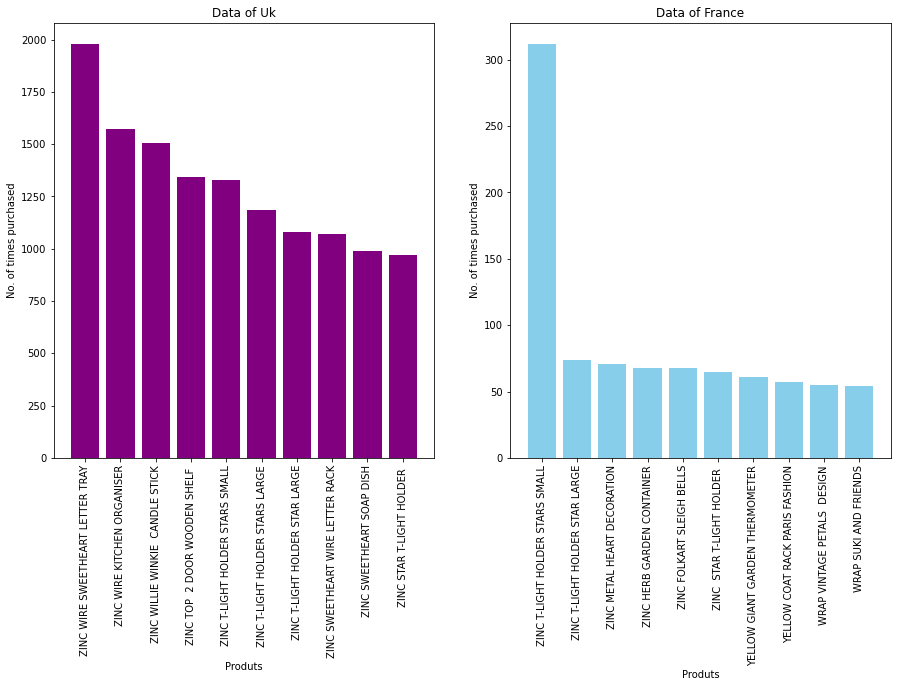

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.bar(sorted(ukdict.keys())[::-1][0:10],sorted(ukdict.values())[::-1][0:10],color='purple')
plt.xticks(rotation = 90 )
plt.xlabel("Produts")
plt.ylabel("No. of times purchased")
plt.title("Data of Uk")

plt.subplot(1,2,2)
plt.bar(sorted(francedict.keys())[::-1][0:10],sorted(francedict.values())[::-1][0:10],color='skyblue')
plt.xticks(rotation = 90 )
plt.xlabel("Produts")
plt.ylabel("No. of times purchased")
plt.title("Data of France")


plt.show()